# How this algorithm works
The algorithum that I will be using today will be the Support Vector Machine(SVM). This algorithum is used with classification and regression. This algorithm in classification is used to find the optimum hyperplace that maximizes the margin between the classes and in regression it trys to minimize the error between the predicted values and the target values.

#  What type of prediction tasks does it fit for?

This algorithm is best fit for the prediction task of a data set that has a high number of features. This also worrks effectivly due to its different kernel functions that handles decision boundaries.

# Advantages of this SVG
The SVG works well with a high number of featues.

The use of different kernel options such as linear, polynimial, and radial basis.

The SVG can also work with non-linear relationships.

# Disadvantages of SVG 
The training of the data can take a long time on larger datasets.

The SVG is senstive to alot of data noise.

The SVG although having alot of kernel options can have to many kernel options and it can be difficult to pick the correct one. 

In [128]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('RealEstate_Georgia.csv')
from sklearn.svm import SVR 
from sklearn.metrics import mean_squared_error

In [129]:
print(df)

       Unnamed: 0                id  stateId  countyId  cityId country  \
0               0   31503-110785431       16        17   55064     USA   
1               1    31503-76611082       16        18   55064     USA   
2               2    31503-93126153       16        19   55064     USA   
3               3   31503-110785598       16        20   55064     USA   
4               4  31503-2101070583       16        21   55064     USA   
...           ...               ...      ...       ...     ...     ...   
13799       13799    30054-69864676       16    128670    8877     USA   
13800       13800    30054-69860763       16    128671    8877     USA   
13801       13801    30054-69887935       16    128672    8877     USA   
13802       13802    30054-69871474       16    128673    8877     USA   
13803       13803    30054-69890123       16    128674    8877     USA   

      datePostedString  is_bankOwned  is_forAuction            event  ...  \
0           2021-07-12            

In [130]:
# Dropping the features that have missing values
df = df.dropna()

In [131]:
# Labeling my features and target
features = [
    'livingArea', 'bathrooms', 'bedrooms', 'yearBuilt', 'parking', 'garageSpaces'
   , 'pool', 'spa', 'isNewConstruction', 'hasPetsAllowed'
   
]
target = 'price'

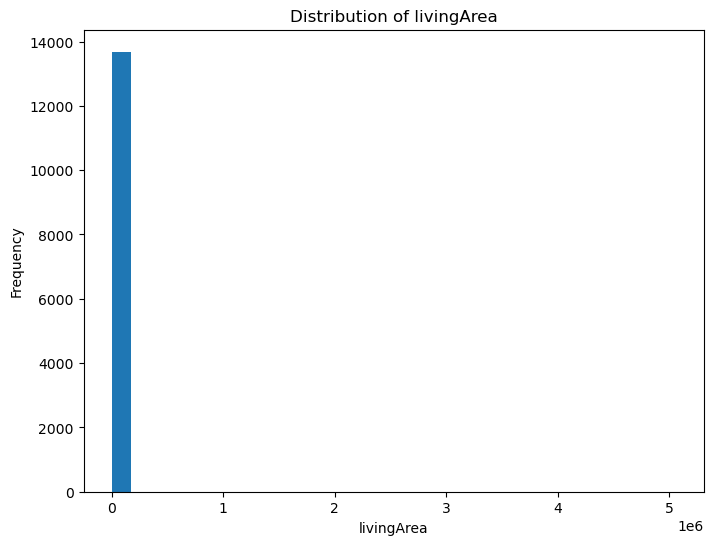

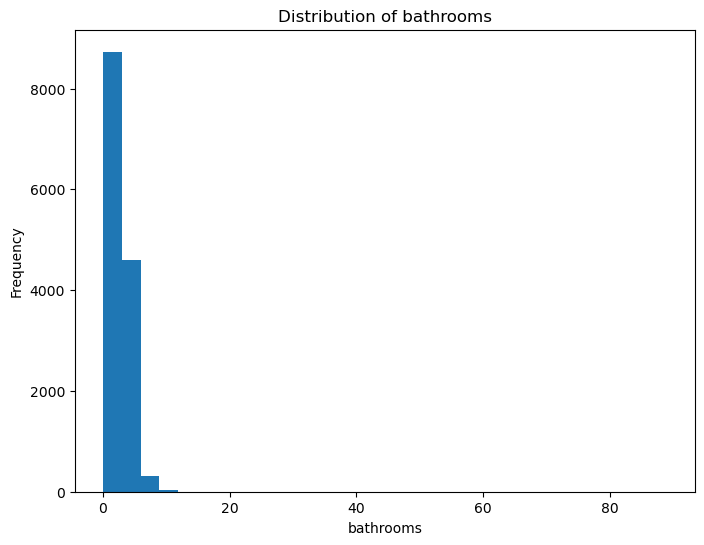

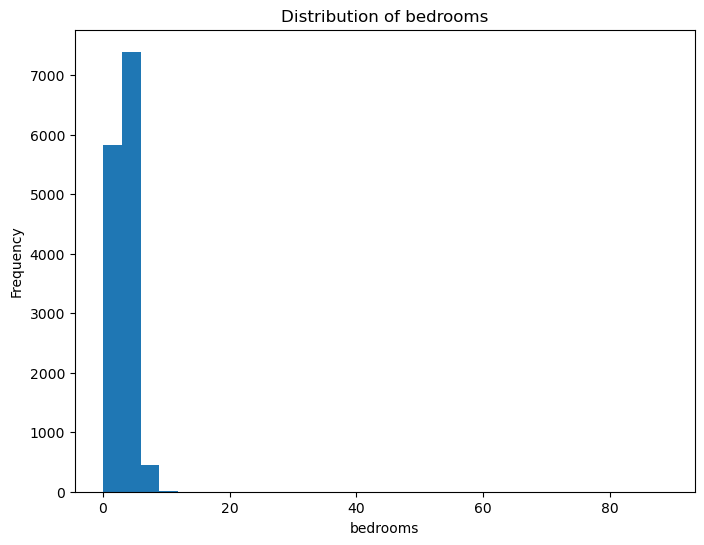

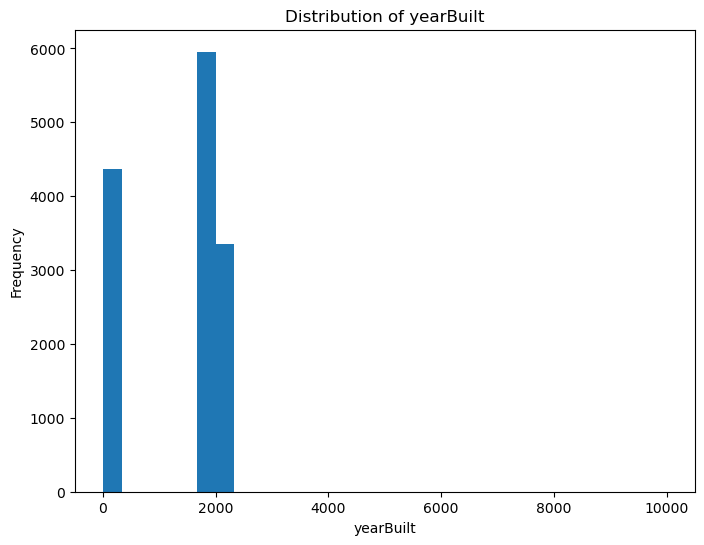

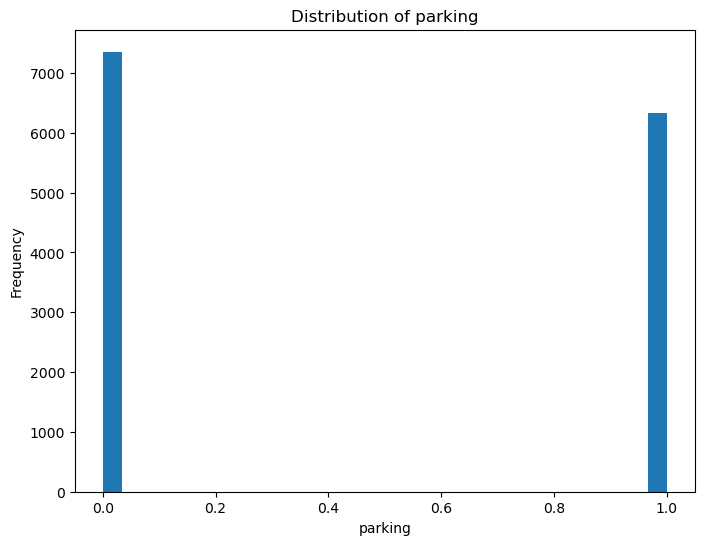

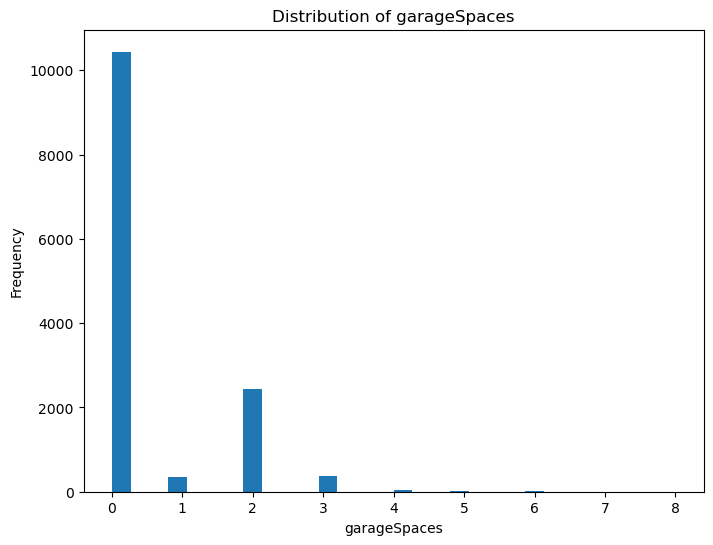

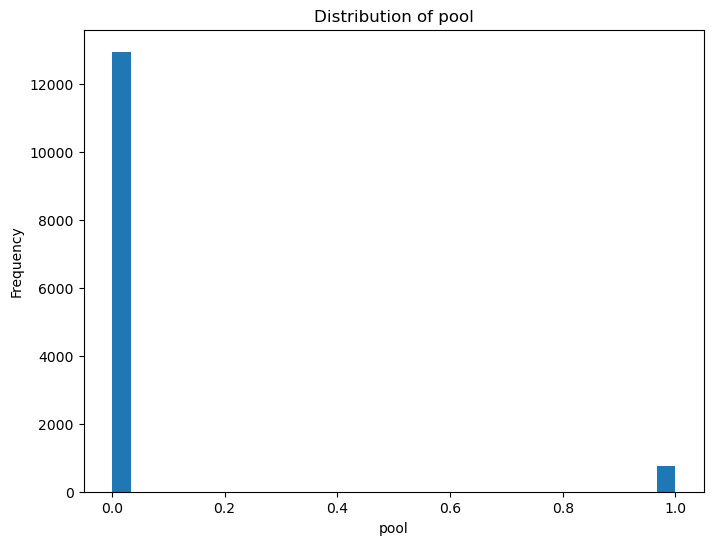

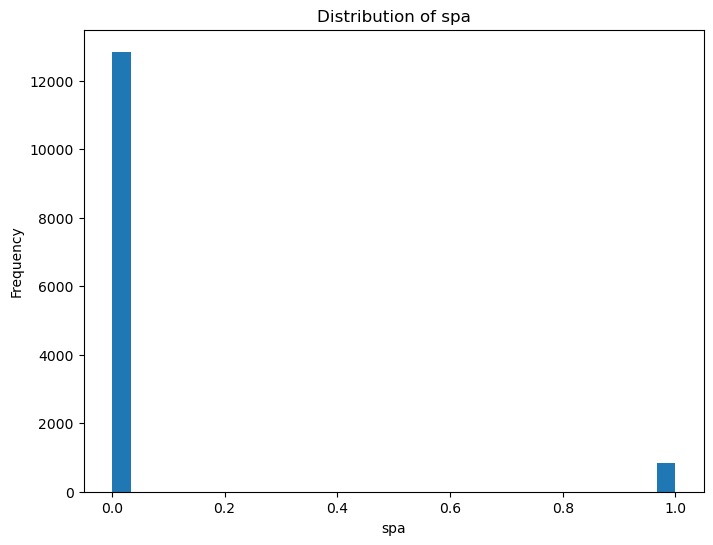

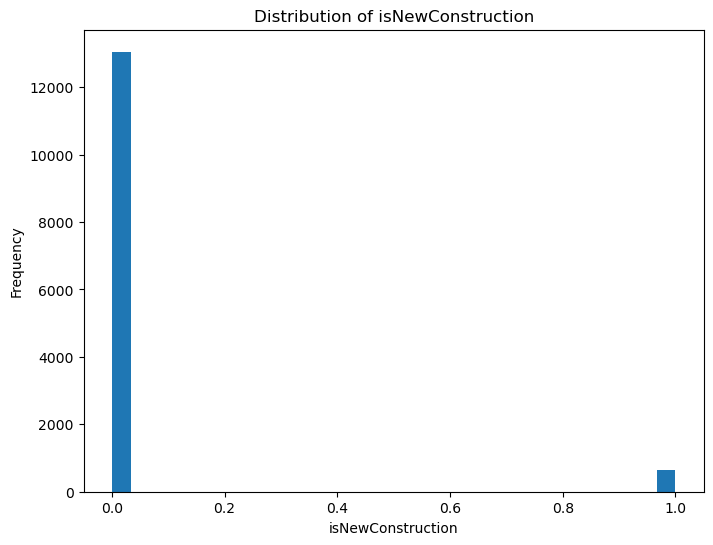

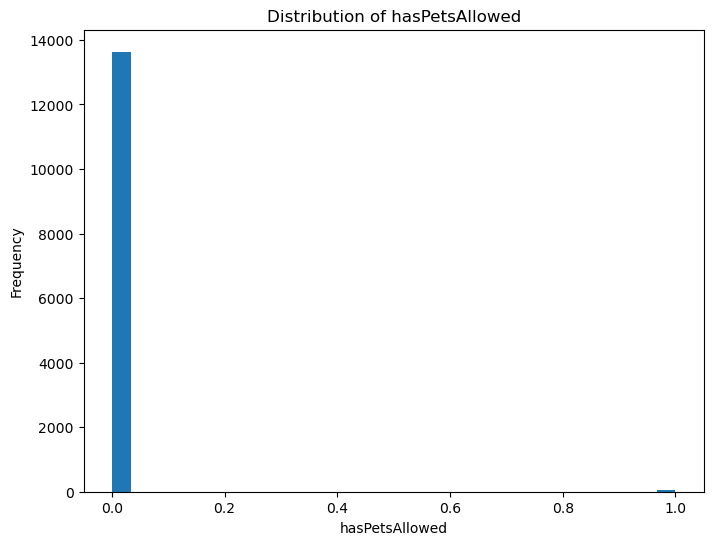

In [132]:
#Plots to visualize data and outliers 
import matplotlib.pyplot as plt


for feature in features:
    plt.figure(figsize=(8, 6))
    plt.hist(df[feature], bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [133]:
from scipy import stats


threshold = 4


for feature in features:
    z_scores = stats.zscore(df[feature])
    df =df[(z_scores < threshold) & (z_scores > -threshold)]

above i used a threshold of 4 to remove outliers as that was the number that lead to the smallest mse score 

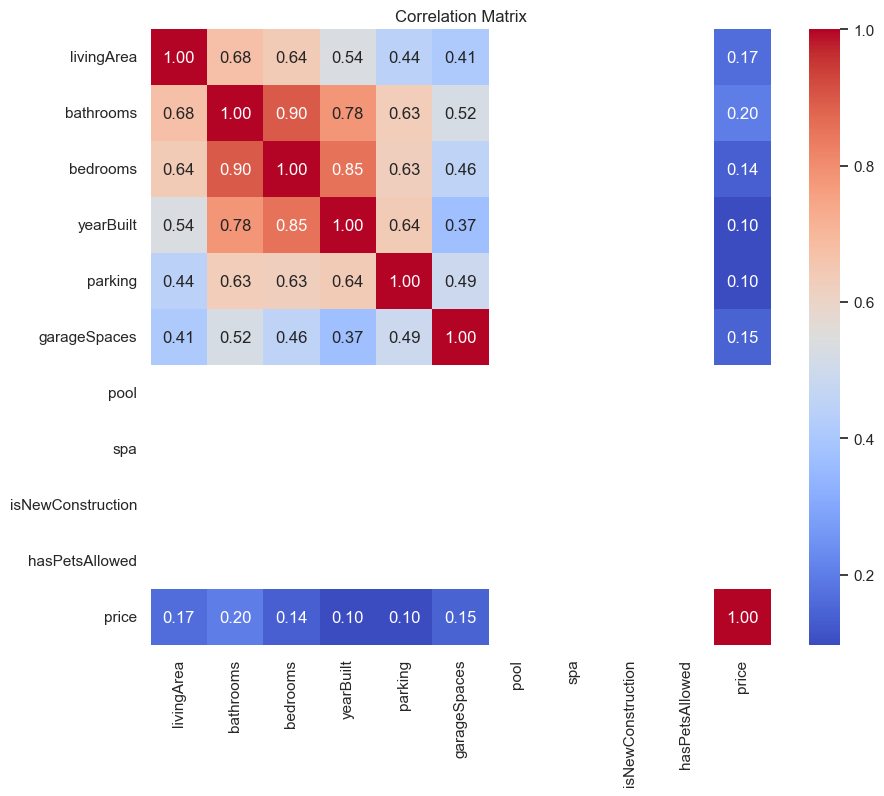

In [135]:
import seaborn as sns
selected_columns = features + [target]
data_subset = df[selected_columns]


correlation_matrix = data_subset.corr()


sns.set(style="white")  
plt.figure(figsize=(10, 8))  


heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")


plt.title('Correlation Matrix')


plt.show()

Above is a correlation matrix where you can see the pool spa isNewConstruction and hasPetsAllowed have a little influence to the data

Below is where i drop those features 

In [136]:
features_to_drop = ['pool', 'spa', 'isNewConstruction', 'hasPetsAllowed']


features = [feature for feature in features if feature not in features_to_drop]

In [137]:
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Above is where i put split the data into the train test split 

In [138]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

above is where i scaled the data

In [139]:
svm_regressor = SVR(kernel='rbf', C=1.0, gamma='scale')

In [140]:
svm_regressor.fit(X_train_scaled, y_train)

SVR()

In [141]:
y_pred = svm_regressor.predict(X_test_scaled)

The three above is where i set up  the svg test

In [142]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 233286207974.39072


This is my score for the SVG and it is a very high score 

In [143]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_scaled, y_train)
y_pred = linear_regressor.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Linear Regression): {mse}")

Mean Squared Error (Linear Regression): 204491752213.97116


Above is the MSE for linear Regression and it still has a very high score but it is lower than the SVG

The test that I have done have proven to show high regression scores. I tried but did not succed in lowering the scores. This may be because of the nature of the housing market and the way pricing works within it. The features that I selected had the highest corelation and seemed to be the best fit. I only included the linear regression test because the others such as k neighbor and dicision tree had an even higher number for the regression score so I decided to not include those results as they were not valuable. The way that may work to lower scores would be better feature enginerring that I did not know about or a different test that is suitable for my dataset.

In [153]:
import pickle


with open("model.pkl", "wb") as file:
    pickle.dump(linear_regressor, file)
